In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler, Binarizer 
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve

import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import seaborn as sns

import missingno as ms
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

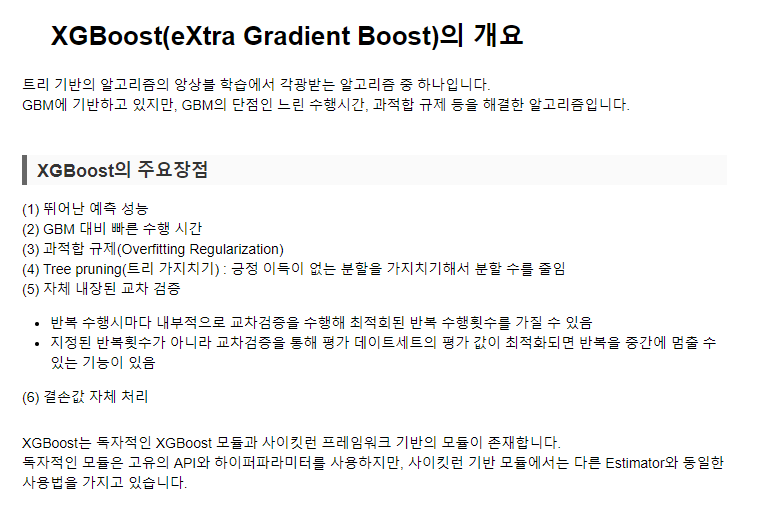

In [55]:
from IPython.display import Image
Image('./images/xgboost-01.png')

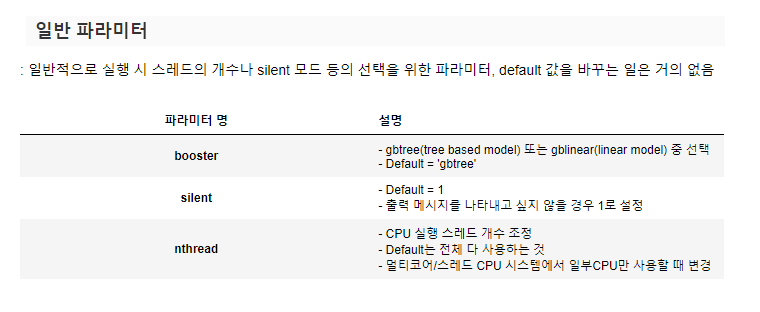

In [56]:
from IPython.display import Image
Image('./images/xgboost-02.png')

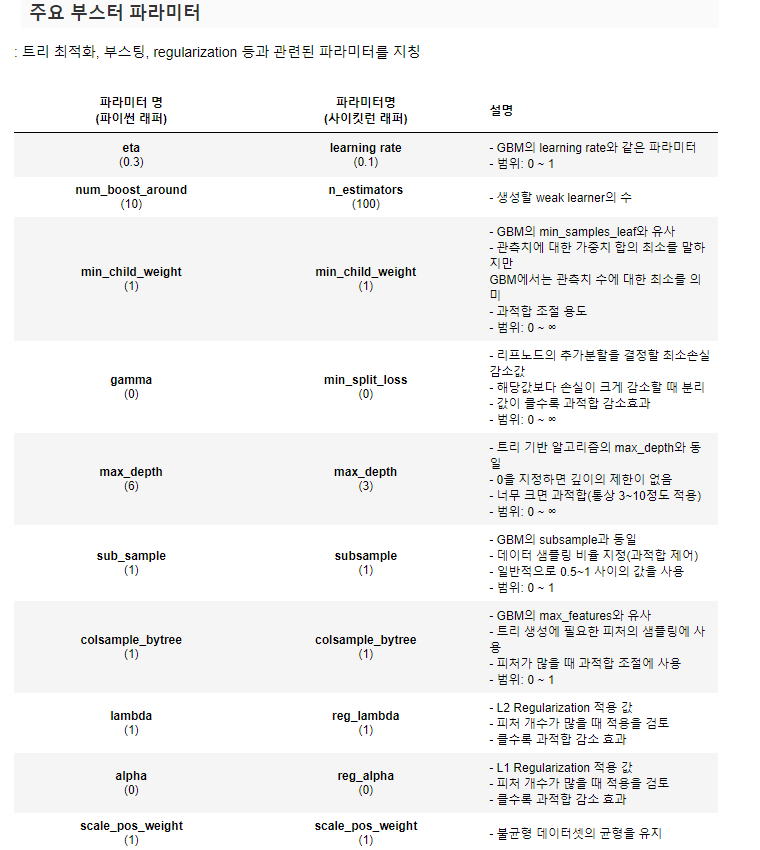

In [57]:
from IPython.display import Image
Image('./images/xgboost-03.png')

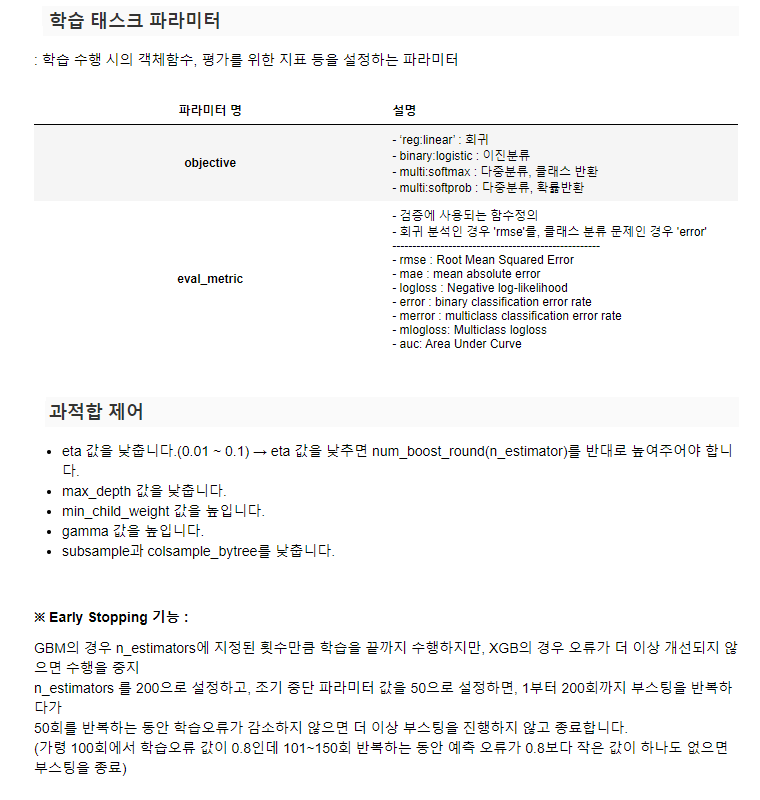

In [58]:
from IPython.display import Image
Image('./images/xgboost-04.png')

In [59]:
from sklearn.datasets import load_breast_cancer

dataset = load_breast_cancer()
# dataset.keys()
features = dataset.data
# features
label = dataset.target
# label

cancer_df = pd.DataFrame(data = features, columns = dataset.feature_names)
cancer_df['target'] = label
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [60]:
# 클래스의 분포비율 확인
cancer_df['target'].value_counts()

1    357
0    212
Name: target, dtype: int64

In [61]:
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size = .2, random_state = 100)

In [62]:
from xgboost import XGBClassifier

In [63]:
sklearn_xgboost_model = XGBClassifier(n_estimators = 400, learning_rate = 0.1, max_depth = 3)
sklearn_xgboost_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=400, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [64]:
y_pred = sklearn_xgboost_model.predict(X_test)

In [65]:
# 혼동행렬, 정확도, 정밀도, 재현율, F1, AUC 확인

def classifier_eval(y_test, y_pred) :
    print('오차행렬 :\n', confusion_matrix(y_test, y_pred))
    print('정확도   :', accuracy_score(y_test, y_pred))
    print('정밀도   :', precision_score(y_test, y_pred))
    print('재현율   :', recall_score(y_test, y_pred))
    print('F1       :', f1_score(y_test, y_pred))
    print('AUC      :', roc_auc_score(y_test, y_pred))

In [66]:
classifier_eval(y_test, y_pred)

오차행렬 :
 [[46  3]
 [ 1 64]]
정확도   : 0.9649122807017544
정밀도   : 0.9552238805970149
재현율   : 0.9846153846153847
F1       : 0.9696969696969696
AUC      : 0.9616954474097332


In [67]:
# 튜닝
sklearn_xgboost_model = XGBClassifier(n_estimators = 400, learning_rate = 0.1, max_depth = 3)

# early_stopping_rounds : 지정 횟수 반복 수행 후 중지할 수 있다.
# logloss : 오류에 대한 성능평가지표 리턴
# verbose : 모델링 결과를 계속 출력
# eval_set : 테스트 데이터가 아닌 미지의 데이터를 넣는게 맞다.
sklearn_xgboost_model.fit(X_train, y_train, early_stopping_rounds = 100, eval_metric = 'logloss', eval_set = [(X_test, y_test)], verbose = True)

[0]	validation_0-logloss:0.61460
Will train until validation_0-logloss hasn't improved in 100 rounds.
[1]	validation_0-logloss:0.55405
[2]	validation_0-logloss:0.49816
[3]	validation_0-logloss:0.44858
[4]	validation_0-logloss:0.40558
[5]	validation_0-logloss:0.37227
[6]	validation_0-logloss:0.34175
[7]	validation_0-logloss:0.31699
[8]	validation_0-logloss:0.29199
[9]	validation_0-logloss:0.27386
[10]	validation_0-logloss:0.25490
[11]	validation_0-logloss:0.23818
[12]	validation_0-logloss:0.22577
[13]	validation_0-logloss:0.21225
[14]	validation_0-logloss:0.20156
[15]	validation_0-logloss:0.19251
[16]	validation_0-logloss:0.18292
[17]	validation_0-logloss:0.17663
[18]	validation_0-logloss:0.17008
[19]	validation_0-logloss:0.16260
[20]	validation_0-logloss:0.15747
[21]	validation_0-logloss:0.15208
[22]	validation_0-logloss:0.14877
[23]	validation_0-logloss:0.14609
[24]	validation_0-logloss:0.14465
[25]	validation_0-logloss:0.14215
[26]	validation_0-logloss:0.13825
[27]	validation_0-loglo

[236]	validation_0-logloss:0.09308
[237]	validation_0-logloss:0.09292
[238]	validation_0-logloss:0.09305
[239]	validation_0-logloss:0.09291
[240]	validation_0-logloss:0.09316
[241]	validation_0-logloss:0.09301
[242]	validation_0-logloss:0.09287
[243]	validation_0-logloss:0.09301
[244]	validation_0-logloss:0.09292
[245]	validation_0-logloss:0.09292
Stopping. Best iteration:
[145]	validation_0-logloss:0.09249



XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=400, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [68]:
y_pred145 = sklearn_xgboost_model.predict(X_test)
classifier_eval(y_test, y_pred145)

오차행렬 :
 [[47  2]
 [ 1 64]]
정확도   : 0.9736842105263158
정밀도   : 0.9696969696969697
재현율   : 0.9846153846153847
F1       : 0.9770992366412214
AUC      : 0.9718995290423862


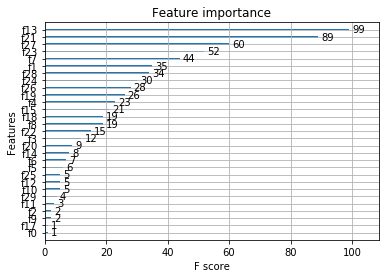

In [69]:
from xgboost import plot_importance

# feature importance
plot_importance(sklearn_xgboost_model)

In [70]:
from sklearn.ensemble import AdaBoostClassifier

In [71]:
# 개별 분류기 생성
knn_clf = KNeighborsClassifier(n_neighbors = 4)
rf_clf = RandomForestClassifier(n_estimators = 100, random_state = 100)
dt_clf = DecisionTreeClassifier()
ada_clf = AdaBoostClassifier(n_estimators = 100)

In [72]:
# 개별 모델에 대한 학습
knn_clf.fit(X_train, y_train)
rf_clf.fit(X_train, y_train)
dt_clf.fit(X_train, y_train)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100)

In [73]:
# 개별 모델에 대한 예측
knn_pred = knn_clf.predict(X_test)
rf_pred = rf_clf.predict(X_test)
dt_pred = dt_clf.predict(X_test)
ada_pred = ada_clf.predict(X_test)

In [74]:
classifier_eval(y_test, knn_pred)
print()

classifier_eval(y_test, rf_pred)
print()

classifier_eval(y_test, dt_pred)
print()

classifier_eval(y_test, ada_pred)

오차행렬 :
 [[48  1]
 [ 5 60]]
정확도   : 0.9473684210526315
정밀도   : 0.9836065573770492
재현율   : 0.9230769230769231
F1       : 0.9523809523809524
AUC      : 0.9513343799058084

오차행렬 :
 [[45  4]
 [ 1 64]]
정확도   : 0.956140350877193
정밀도   : 0.9411764705882353
재현율   : 0.9846153846153847
F1       : 0.962406015037594
AUC      : 0.95149136577708

오차행렬 :
 [[46  3]
 [ 3 62]]
정확도   : 0.9473684210526315
정밀도   : 0.9538461538461539
재현율   : 0.9538461538461539
F1       : 0.9538461538461539
AUC      : 0.9463108320251179

오차행렬 :
 [[46  3]
 [ 1 64]]
정확도   : 0.9649122807017544
정밀도   : 0.9552238805970149
재현율   : 0.9846153846153847
F1       : 0.9696969696969696
AUC      : 0.9616954474097332


In [78]:
# 학습을 마친 모델의 예측결과를 합쳐서 최종 예측
merge_pred = np.array([knn_pred, rf_pred, dt_pred, ada_pred])
merge_pred

array([[0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
        0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
        1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
        0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
        0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
        0, 1, 0, 1],
       [0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
        0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
        1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
        0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
        0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        0, 1, 0, 1],
       [0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1,
        0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
        1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,

In [79]:
merge_pred = np.transpose(merge_pred) # 각 리스트의 n번째 요소들이 하나의 리스트로 합쳐진다.
merge_pred[:20]

array([[0, 0, 0, 0],
       [1, 1, 1, 1],
       [0, 0, 0, 0],
       [1, 1, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 1],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 1, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 1],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [1, 1, 1, 1],
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       [1, 1, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 1]])

In [80]:
# 최종 분류기 선택, MetaModel 생성
lr_clf = LogisticRegression()
lr_clf.fit(merge_pred, y_test)

final_pred = lr_clf.predict(merge_pred)
classifier_eval(y_test, final_pred)

오차행렬 :
 [[48  1]
 [ 1 64]]
정확도   : 0.9824561403508771
정밀도   : 0.9846153846153847
재현율   : 0.9846153846153847
F1       : 0.9846153846153847
AUC      : 0.9821036106750393


In [81]:
X_test

array([[1.791e+01, 2.102e+01, 1.244e+02, ..., 1.964e-01, 3.245e-01,
        1.198e-01],
       [1.434e+01, 1.347e+01, 9.251e+01, ..., 1.087e-01, 3.062e-01,
        6.072e-02],
       [2.016e+01, 1.966e+01, 1.311e+02, ..., 1.425e-01, 3.055e-01,
        5.933e-02],
       ...,
       [1.303e+01, 1.842e+01, 8.261e+01, ..., 5.013e-02, 1.987e-01,
        6.169e-02],
       [1.825e+01, 1.998e+01, 1.196e+02, ..., 1.932e-01, 3.063e-01,
        8.368e-02],
       [9.847e+00, 1.568e+01, 6.300e+01, ..., 6.528e-02, 2.502e-01,
        9.209e-02]])

In [82]:
# 과적합(overfitting)을 보완하기 위한 교차검증 수행
# CV 세트를 기반으로 코드를 변경
# 회귀모델의 평가 지표로 활용 -> MAE(Mean of Absolute Errors)
# 실제값과 예측 값의 차이를 절대값으로 변환된 평균

from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

In [83]:
def get_stacking_base_datasets(model, X_train_n, y_train_n, X_test_n, n_folds ):
    # 지정된 n_folds값으로 KFold 생성.
    kf = KFold(n_splits = n_folds, shuffle = False, random_state = 0)
    
    #추후에 메타 모델이 사용할 학습 데이터 반환을 위한 넘파이 배열 초기화 
    train_fold_pred = np.zeros((X_train_n.shape[0], 1))
    test_pred = np.zeros((X_test_n.shape[0], n_folds))
    print(model.__class__.__name__ , ' model 시작 ')
    
    for folder_counter, (train_index, valid_index) in enumerate(kf.split(X_train_n)):
        #입력된 학습 데이터에서 기반 모델이 학습/예측할 폴드 데이터 셋 추출 
        print('\t 폴드 세트: ', folder_counter, ' 시작 ')
        X_tr = X_train_n[train_index] 
        y_tr = y_train_n[train_index] 
        X_te = X_train_n[valid_index]  
        
        #폴드 세트 내부에서 다시 만들어진 학습 데이터로 기반 모델의 학습 수행.
        model.fit(X_tr, y_tr)       
        #폴드 세트 내부에서 다시 만들어진 검증 데이터로 기반 모델 예측 후 데이터 저장.
        train_fold_pred[valid_index, :] = model.predict(X_te).reshape(-1,1)
        #입력된 원본 테스트 데이터를 폴드 세트내 학습된 기반 모델에서 예측 후 데이터 저장. 
        test_pred[:, folder_counter] = model.predict(X_test_n)
            
    # 폴드 세트 내에서 원본 테스트 데이터를 예측한 데이터를 평균하여 테스트 데이터로 생성 
    test_pred_mean = np.mean(test_pred, axis = 1).reshape(-1, 1)    
    
    #train_fold_pred는 최종 메타 모델이 사용하는 학습 데이터, test_pred_mean은 테스트 데이터
    return train_fold_pred, test_pred_mean

In [84]:
knn_train, knn_test = get_stacking_base_datasets(knn_clf, X_train, y_train, X_test, 5)
rf_train, rf_test = get_stacking_base_datasets(rf_clf, X_train, y_train, X_test, 5)
dt_train, dt_test = get_stacking_base_datasets(dt_clf, X_train, y_train, X_test, 5)
ada_train, ada_test = get_stacking_base_datasets(ada_clf, X_train, y_train, X_test, 5)

KNeighborsClassifier  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
RandomForestClassifier  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
DecisionTreeClassifier  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
AdaBoostClassifier  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 


In [85]:
stacking_train = np.concatenate((knn_train, rf_train, dt_train, ada_train), axis = 1)
# stacking_train

stacking_test = np.concatenate((knn_test, rf_test, dt_test, ada_test), axis = 1)
# stacking_test

In [86]:
# 메타 모델 학습
lr_clf.fit(stacking_train, y_train)
stacking_pred = lr_clf.predict(stacking_test)

classifier_eval(y_test, stacking_pred)

오차행렬 :
 [[48  1]
 [ 1 64]]
정확도   : 0.9824561403508771
정밀도   : 0.9846153846153847
재현율   : 0.9846153846153847
F1       : 0.9846153846153847
AUC      : 0.9821036106750393
